# Coursera Dataset Analysis

### About Coursera

Coursera was launched in 2012 by two Stanford Computer Science professors, Andrew Ng and Daphne Koller, with a mission to provide universal access to world-class learning. It is now one of the largest online learning platforms in the world, with 124 million registered learners as of March 31, 2023. Coursera partners with over 300 leading university and industry partners to offer a broad catalog of content and credentials, including courses, Specializations, Professional Certificates, Guided Projects, and bachelor’s and master’s degrees. 

Institutions around the world use Coursera to upskill and reskill their employees, citizens, and students in fields such as data science, technology, and business. Coursera became a Delaware public benefit corporation and a B Corp in February 2021.

### About the Dataset
This dataset contains mainly 6 columns and 890 course data. 

The detailed description:
1. course_title : Contains the course title.

2. course_organization : It tells which organization is conducting the courses.

3. course_Certificate_type : It has details about what are the different certifications available in courses.

4. course_rating : It has the ratings associated with each course.

5. course_difficulty : It tells about how difficult or what is the level of the course.

6. course_students_enrolled : It has the number of students that are enrolled in the course.

### Objectives

To unlock opportunities for the stakeholders that will drive improvement and promotion of the platform and the courses by:

* Optimizing course offerings based on popularity and demand.
* Understanding which course difficulty levels attract the most students.
* Determining the most sought-after certification types.
* Analyzing ratings to improve course content and student satisfaction.

### Stakeholders (Potential)

* Course Manager: Oversees the overall management of courses on the platform.    
* Instructional Designer: Designs courses to be engaging and effective.
* Instructors/Trainers: Deliver live sessions or record instructional videos.
* Marketing/Product Specialist: Promotes courses to attract learners.

### Data Loading and Initialization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
%matplotlib inline
import seaborn as sns

In [4]:
coursera = pd.read_csv("coursera_data.csv")

### Data Cleaning and Exploration

Exploring the columns in the dataset and familiarizing with the data.

In [9]:
coursera.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

Dropping unnamed column as in the original dataset, it was used only for counting and served no further purpose.

In [5]:
coursera = coursera.drop("Unnamed: 0", axis =1)

In [6]:
coursera.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [10]:
coursera.shape

(891, 6)

In [11]:
coursera.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

The course_students_enrolled data contains the number of students enrolled in each course but the datatype is seen as an Object. To be able to use it later, we will convert it to numeric. Looking further into the dataset, I found out there are strings ending in either 'm' or 'k', so we convert the strings to numeric in respective millions and thousands unit.

In [12]:
def convert_to_numeric(value):
    if value[-1] == 'k':  # Check if the value ends with 'k'
        return round(float(value[:-1]) * 1_000)  # Remove 'k', convert to float, and multiply by 1,000
    elif value[-1] == 'm':  # Check if the value ends with 'm'
        return round(float(value[:-1]) * 1_000_000)  # Remove 'm', convert to float, and multiply by 1,000,000
    else:
        return round(float(value))  # Handle plain numbers without a suffix

# Apply the conversion function to the Series
coursera["course_students_enrolled"] = coursera["course_students_enrolled"].apply(convert_to_numeric)

Validating if the data correctly converted. The result below shows that 'm' was converted to million and 'k' to thousands and the DataType for "course_students_enrolled" was also changed from 'Object' to 'int64'.

In [13]:
coursera[coursera["course_title"] == 'Machine Learning']

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000


In [14]:
coursera.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int64
dtype: object

#### Checking for null and duplicates.

In [16]:
coursera.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [17]:
coursera.duplicated().sum()

0

There are no null and duplicated values in the dataset.

#### Checking for Outliers 

In [18]:
# Using IQR-based outliers to check whether the data we have outliers
numeric_df = coursera.select_dtypes(include='number')
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows with outliers
outliers = numeric_df[(numeric_df < lower_bound) | (numeric_df > upper_bound)].dropna(how='all')
print("Outliers based on IQR:")
outliers

Outliers based on IQR:


,course_rating,course_students_enrolled
4,NaN,320000.0
6,NaN,350000.0
18,NaN,540000.0
27,NaN,320000.0
43,NaN,270000.0
...,...,...
850,NaN,310000.0
859,NaN,280000.0
864,NaN,260000.0
869,NaN,270000.0


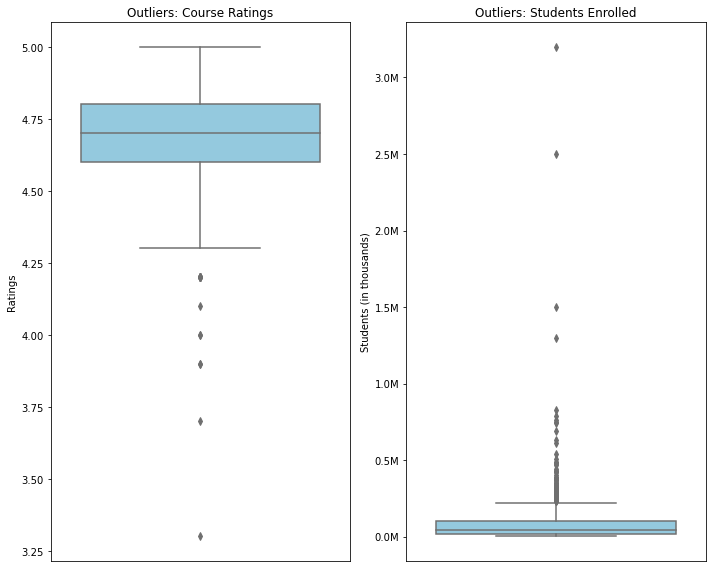

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

sns.boxplot(y='course_rating', ax=axes[0], data=coursera, color = 'skyblue')
axes[0].set_title("Outliers: Course Ratings")
axes[0].set_ylabel("Ratings")
axes[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Remove x-axis ticks

# Boxplot for students enrolled
sns.boxplot(y='course_students_enrolled', ax=axes[1], data=coursera, color = 'skyblue')
axes[1].set_title("Outliers: Students Enrolled")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
axes[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Remove x-axis ticks
axes[1].set_ylabel("Students (in thousands)")

# Show the Plot
plt.tight_layout()
plt.show()

We can see that we have 94 rows of data containing outliers. However, the course rating can be between 1 to 5, so we will not be removing those ratings and the number of students who enroll in a course can vary as well depending on the popularity of the course, so we will not be removing these values as well. They may provide us with further insights in the later stages of analysis. However, we need to be careful about using mean as it is strongly impacted by outliers.

### Exploratory Data Analysis (EDA)

In [20]:
print(f"There are {coursera['course_organization'].nunique()} unique organizations contributing courses to coursera.")

There are 154 unique organizations contributing courses to coursera.


In [21]:
coursera["course_Certificate_type"].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

There are 154 unique organizations contributing courses to coursera in different certificate level i.e. specialization, course, professional certificate. 

Looking further into most popular course based on student enrollment.

#### Most Popular Course based on enrollment

In [22]:
max_enrollment = coursera[coursera['course_students_enrolled'] == coursera['course_students_enrolled'].max()]
max_enrollment

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000


#### Course Difficulty and Popularity

In [23]:
course_level_enrollment = pd.DataFrame(coursera.groupby("course_difficulty", as_index=False).course_students_enrolled.sum().sort_values(by = 'course_students_enrolled'))
course_level_enrollment

,course_difficulty,course_students_enrolled
0,Advanced,1264400
2,Intermediate,14506300
3,Mixed,24989400
1,Beginner,39921800


/Users/sujamanandhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

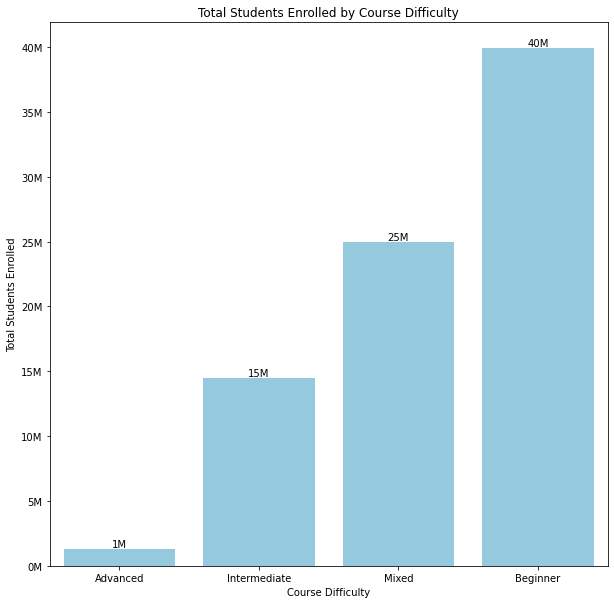

In [25]:
# Create the bar chart
plt.figure(figsize=(10, 10))
ax = sns.barplot( course_level_enrollment["course_difficulty"],  course_level_enrollment["course_students_enrolled"], color='skyblue')

# Format y-axis to display in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

# Add titles and labels
plt.title("Total Students Enrolled by Course Difficulty")
plt.xlabel("Course Difficulty")
plt.ylabel("Total Students Enrolled")
ax.bar_label(ax.containers[0], labels=[f'{x/1000000:,.0f}M' for x in ax.containers[0].datavalues])

# Show the plot
plt.tight_layout

Most students enroll into beginner level course. Around **39.9 million** students enroll in **beginner level** courses, **24 million** in **mixed**, and **14 million** in **intermediate level**.

In [26]:
certificate_enrollment = pd.DataFrame(coursera.groupby("course_Certificate_type", as_index= False).course_students_enrolled.sum().sort_values(by = "course_students_enrolled"))

/Users/sujamanandhar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

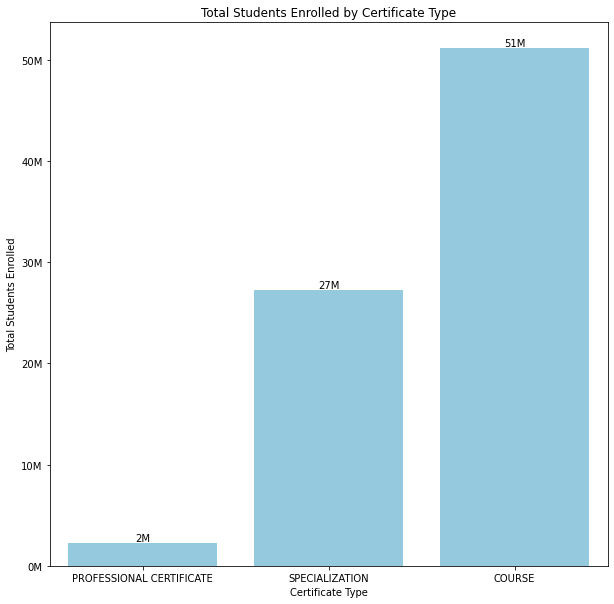

In [27]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(certificate_enrollment["course_Certificate_type"],  certificate_enrollment["course_students_enrolled"], color='skyblue')

# Format y-axis to display in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

# Add titles and labels
plt.title("Total Students Enrolled by Certificate Type")
plt.xlabel("Certificate Type")
plt.ylabel("Total Students Enrolled")
ax.bar_label(ax.containers[0], labels=[f'{x/1000000:,.0f}M' for x in ax.containers[0].datavalues])

# Show the plot
plt.tight_layout


Most students preferred course to specialization and professional certificate. We want to look further at which level of difficulty enrolls more student in various Certificate type.

In [28]:
course_difficulty_certificate = coursera.groupby(["course_Certificate_type","course_difficulty"]).course_students_enrolled.sum().reset_index()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

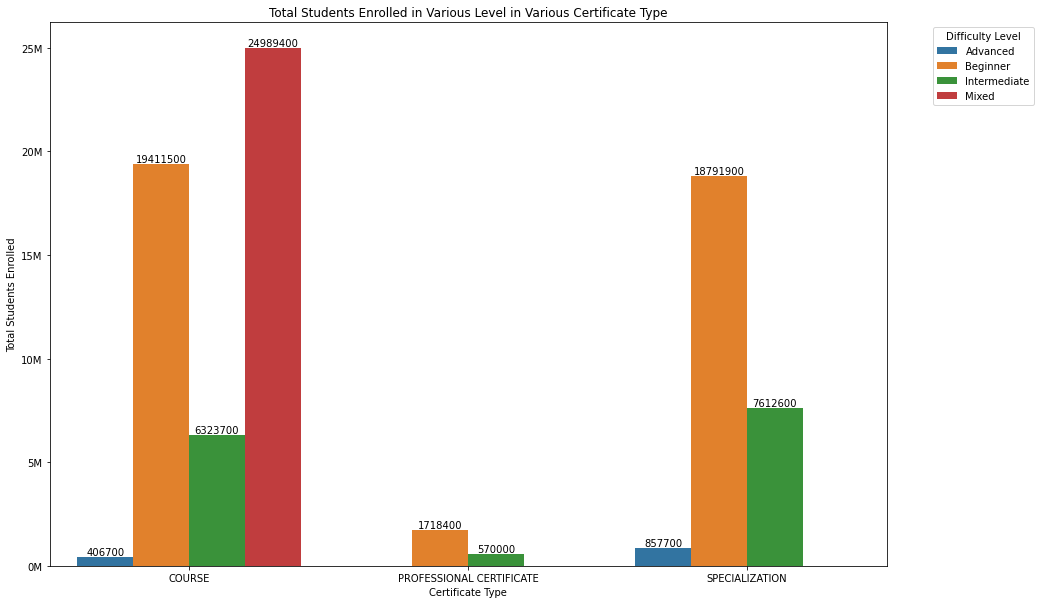

In [30]:
plt.figure(figsize = (15,10))

ax = sns.barplot(y = course_difficulty_certificate["course_students_enrolled"], x = course_difficulty_certificate["course_Certificate_type"], hue = course_difficulty_certificate["course_difficulty"], estimator=sum)

# Format y-axis to display in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

# Add titles and labels
plt.title("Total Students Enrolled in Various Level in Various Certificate Type")
plt.xlabel("Certificate Type")
plt.ylabel("Total Students Enrolled")

# Add Labels to Bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  
    
# Move Legend to the Side
ax.legend(title="Difficulty Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout

Beginner level of difficulty has the most enrolled students in professional and specialization courses while it is the second highest in the normal course. Beginner level courses are most popular among all the course level.

#### Looking further into number of courses in each certification type and difficulty level

In [31]:
course_count = coursera.groupby(["course_Certificate_type","course_difficulty"]).course_title.count().reset_index()
course_count

,course_Certificate_type,course_difficulty,course_title
0,COURSE,Advanced,9
1,COURSE,Beginner,282
2,COURSE,Intermediate,104
3,COURSE,Mixed,187
4,PROFESSIONAL CERTIFICATE,Beginner,9
5,PROFESSIONAL CERTIFICATE,Intermediate,3
6,SPECIALIZATION,Advanced,10
7,SPECIALIZATION,Beginner,196
8,SPECIALIZATION,Intermediate,91


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

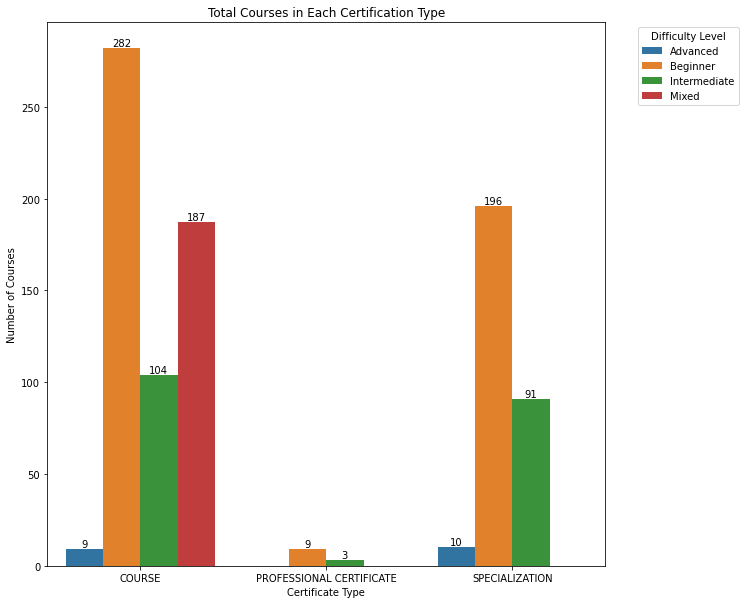

In [33]:
plt.figure(figsize = (10,10))

ax = sns.barplot(y = course_count["course_title"], x = course_count["course_Certificate_type"], hue = course_count["course_difficulty"], estimator=sum)

# Add titles and labels
plt.title("Total Courses in Each Certification Type")
plt.xlabel("Certificate Type")
plt.ylabel("Number of Courses")

# Add Labels to Bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  
    
# Move Legend to the Side
ax.legend(title="Difficulty Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout

From the graph, we can see that there are more beginner level courses than other difficulty levels in all the certification type. 

### Hypothesis

As we see the course level that contains more number of course has higher enrollment. I assume, there is a strong relationship between number of courses and number of enrollment.

To further analyse this, we create a new dataframe by joining dataframe with number of students enrolled and number of courses which is grouped by:
1. Course Organization
2. Course Difficulty level

**1. Course Organization**

In [94]:
total_student = pd.DataFrame(coursera.groupby("course_organization", as_index = True).course_students_enrolled.sum())

total_courses = pd.DataFrame(coursera.groupby("course_organization", as_index = True).course_title.count())

number_course_student = total_student.join(total_courses, on = "course_organization", how = "left")
number_course_student.rename(columns = {"course_title":"number_of_courses"}, inplace = True)
number_course_student.head(10)

,course_students_enrolled,number_of_courses
course_organization,,
(ISC)²,9900,3
Amazon Web Services,364000,6
American Institute of Business and Economics,11000,1
American Museum of Natural History,30000,2
Arizona State University,589500,7
Atlassian,80000,2
Autodesk,48200,4
Automation Anywhere,2200,1
BCG,20000,1


In [35]:
numeric_feat = number_course_student.select_dtypes(include='number')
cor_matrix = numeric_feat.corr()

cor_matrix.stack().drop_duplicates(keep = 'first', inplace = False)


course_students_enrolled  course_students_enrolled    1.000000
                          number_of_courses           0.880679
dtype: float64

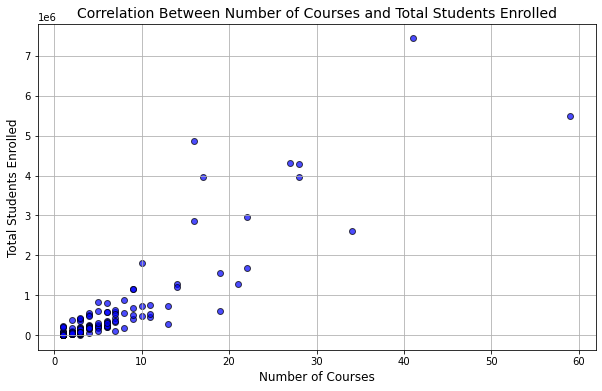

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(
    number_course_student['number_of_courses'],
    number_course_student['course_students_enrolled'],
    color='blue',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Correlation Between Number of Courses and Total Students Enrolled", fontsize=14)
plt.xlabel("Number of Courses", fontsize=12)
plt.ylabel("Total Students Enrolled", fontsize=12)
plt.grid(True)
plt.show()

**Result**

Strong positive correlation between enrollment and number of courses.

**2. Course Difficulty Level**

In [37]:
total_student = pd.DataFrame(coursera.groupby("course_difficulty", as_index = True).course_students_enrolled.sum())

total_courses = pd.DataFrame(coursera.groupby("course_difficulty", as_index = True).course_title.count())

number_course_student = total_student.join(total_courses, on = "course_difficulty", how = "left")
number_course_student.rename(columns = {"course_title":"number_of_courses"}, inplace = True)
number_course_student

,course_students_enrolled,number_of_courses
course_difficulty,,
Advanced,1264400,19
Beginner,39921800,487
Intermediate,14506300,198
Mixed,24989400,187


#### Calculating correlation

In [38]:
numeric_feat = number_course_student.select_dtypes(include='number')
cor_matrix = numeric_feat.corr()

cor_matrix.stack().drop_duplicates(keep = 'first', inplace = False)


course_students_enrolled  course_students_enrolled    1.000000
                          number_of_courses           0.948046
dtype: float64

**Result**

As assumed the number of student enrolled has a strong positive correlation with number of courses in particular difficulty level i.e. Higher the number of courses, higher the course enrollment number.

#### Course Ratings 

We look at high rated courses i.e Top 10% for different levels.

In [69]:
high_rated_advance = coursera[(coursera["course_difficulty"]=="Advanced") & (coursera["course_rating"]>coursera["course_rating"].quantile(0.90))]
print(f"There are {high_rated_advance.iloc[:,1].count()} highly rated advanced courses are: ")
high_rated_advance

There are 1 highly rated advanced courses are: 


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
600,Medical Neuroscience,Duke University,COURSE,4.9,Advanced,170000


In [91]:
high_rated_beginner = coursera[(coursera["course_difficulty"]=="Beginner") & (coursera["course_rating"]>coursera["course_rating"].quantile(0.90))]
print(f"There are {high_rated_beginner.iloc[:,1].count()} among which top 5 highly rated, most enrolled beginner courses are: ")
high_rated_beginner.sort_values(by = ["course_rating", "course_students_enrolled"], ascending = False).head(5)

There are 39 among which top 5 highly rated, most enrolled beginner courses are: 


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500
322,First Step Korean,Yonsei University,COURSE,4.9,Beginner,400000
427,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,COURSE,4.9,Beginner,270000
512,Introduction to Psychology,Yale University,COURSE,4.9,Beginner,270000
291,Excel Skills for Business,Macquarie University,SPECIALIZATION,4.9,Beginner,240000


In [90]:
high_rated_inter = coursera[(coursera["course_difficulty"]=="Intermediate") & (coursera["course_rating"]>coursera["course_rating"].quantile(0.90))]
print(f"There are {high_rated_inter.iloc[:,1].count()} among which top 5 highly rated, most enrolled intermediate courses are: ")
high_rated_inter.sort_values(by = ["course_rating", "course_students_enrolled"], ascending = False).head(5)

There are 13 among which top 5 highly rated, most enrolled intermediate courses are: 


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600
626,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,Intermediate,630000
162,Convolutional Neural Networks,deeplearning.ai,COURSE,4.9,Intermediate,240000
294,Excel Skills for Business: Intermediate I,Macquarie University,COURSE,4.9,Intermediate,76000
878,Искусство разработки на современном C++,E-Learning Development Fund,SPECIALIZATION,4.9,Intermediate,68000


In [89]:
high_rated_mix = coursera[(coursera["course_difficulty"]=="Mixed") & (coursera["course_rating"]>coursera["course_rating"].quantile(0.90))]
print(f"There are {high_rated_mix.iloc[:,1].count()} among which top 5 highly rated, most enrolled mix courses are: ")
high_rated_mix.sort_values(by = ["course_rating", "course_students_enrolled"], ascending = False).head(5)

There are 17 among which top 5 highly rated, most enrolled mix courses are: 


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
684,Python Data Structures,University of Michigan,COURSE,4.9,Mixed,420000
82,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,COURSE,4.9,Mixed,210000
477,Introduction to Classical Music,Yale University,COURSE,4.9,Mixed,150000


### Hypothesis 

Course ratings and course enrollments have a strong relationship. 

In [43]:
numeric_feat = coursera.select_dtypes(include='number')
correlation_matrix = numeric_feat.corr()

correlation_matrix.stack().drop_duplicates(keep = 'first', inplace = False)


course_rating  course_rating               1.00000
               course_students_enrolled    0.07109
dtype: float64

**Result**

There is no strong relationship between course rating and number of students getting enrolled. That means there could be other factors that might impact the student enrollment which requires further study.

#### Further looking into average ratings per organization, courses, difficulty level and certificate type
We take median as as per the outlier calculations before, our data is skewed and is highly sensitive to mean values.

In [54]:
grouped = coursera.groupby("course_organization").course_rating.median()
print(f"Average rating per organization: {grouped}\n Minimum rating: {grouped.min()}\n Maximum rating: {grouped.max()} ")

Average rating per organization: course_organization
(ISC)²                                          4.70
Amazon Web Services                             4.55
American Institute of Business and Economics    4.40
American Museum of Natural History              4.75
Arizona State University                        4.90
                                                ... 
Yonsei University                               4.75
deeplearning.ai                                 4.75
École Polytechnique                             4.80
École Polytechnique Fédérale de Lausanne        4.75
École des Ponts ParisTech                       4.70
Name: course_rating, Length: 154, dtype: float64
 Minimum rating: 4.3
 Maximum rating: 4.9 


The average ratings for the courses per organization ranges from 4.3 to 4.9 which is a good score. The students seems to be satisfied with the courses from all the organization.

#### Highest rated organization

In [55]:
highest_median_rate = grouped.max()

#Find the organization(s) with the highest mean rating
highest_rated_universities = grouped[grouped == highest_median_rate]
highest_rated_universities

course_organization
Arizona State University                       4.9
Crece con Google                               4.9
Google - Spectrum Sharing                      4.9
Hebrew University of Jerusalem                 4.9
London Business School                         4.9
Nanyang Technological University, Singapore    4.9
ScrumTrek                                      4.9
Universidade Estadual de Campinas              4.9
Universidade de São Paulo                      4.9
University of Florida                          4.9
Name: course_rating, dtype: float64

In [92]:
#Filter the original DataFrame to include only rows for the highest-rated organization(s)
result = coursera[coursera['course_organization'].isin(highest_rated_universities)]

In [57]:
course_difficulty_certificate = coursera.groupby(["course_Certificate_type","course_difficulty"]).course_rating.median().reset_index()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

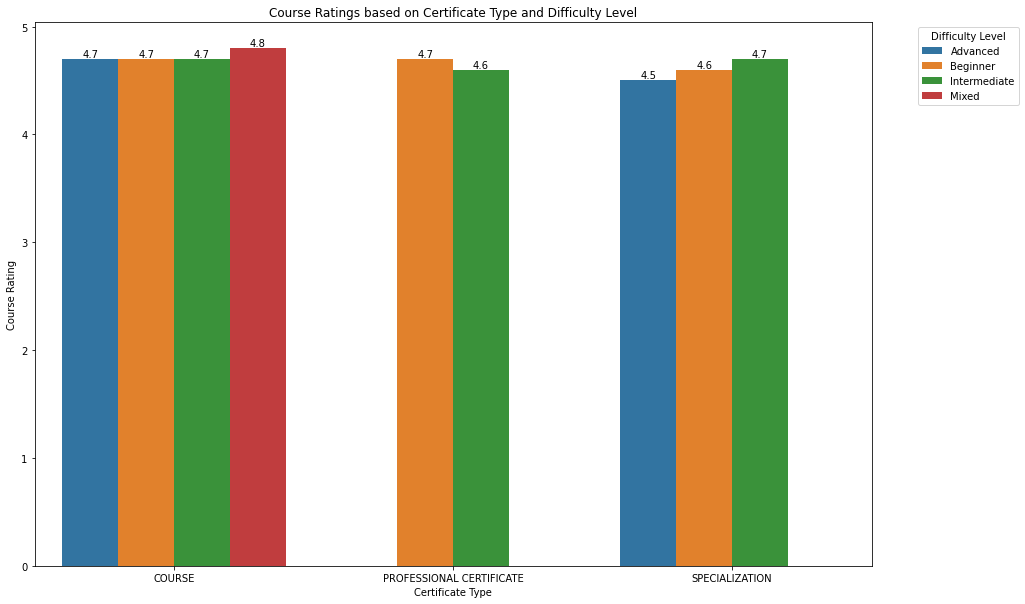

In [60]:
plt.figure(figsize = (15,10))

ax = sns.barplot(y = course_difficulty_certificate["course_rating"], x = course_difficulty_certificate["course_Certificate_type"], hue = course_difficulty_certificate["course_difficulty"])


# Add titles and labels
plt.title("Course Ratings based on Certificate Type and Difficulty Level")
plt.xlabel("Certificate Type")
plt.ylabel("Course Rating")

# Add Labels to Bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')  
    
# Move Legend to the Side
ax.legend(title="Difficulty Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout

Regardless of the level and certificate type, most of the courses have average rating higher that 4.

### Key Insights

1. Maximum number of students are enrolled in Beginner Level Courses i.e 40 Million making it the most popular difficuluty level.


2. Maximum number of students are enrolled in Course Certificate type i.e. 51 Million making it the most popular course type.


3. There is a strong relationship between course enrollment and number of courses. In order to increase number of students in other courses, we can experiment by adding more courses in required groups.


4. Most courses are rated above 4 regardless of course level and certificate type reflecting that the students are satisfied with the courses.